<a href="https://colab.research.google.com/github/gabrfern99/lia1_2024_1/blob/main/Entregas%20-%20Gabriel%20Fernando/Ciencia_de_Dados_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução à Ciência de Dados - Íris Dataset**

O [Íris Dataset](https://archive.ics.uci.edu/dataset/53/iris) é um dos primeiros conjuntos de dados usados ​na literatura sobre métodos de classificação e amplamente utilizado em estatística e aprendizado de máquina.

O conjunto de dados **contém 3 classes de 50 instâncias cada**, onde cada classe se refere a um tipo de planta de íris.

**Não há mágica. Há matemática!** 🧙

# 1. Bibliotecas necessárias para o projeto

## Para este notebook, deve ser utilizada a mesma versão apresentada pelo professor da disciplina.

* matplotlib (versão 3.1.3 ou superior): construção e exibição de gráficos variados.
* seaborn (versão 0.10.0 ou superior): construção e exibição de gráficos variados.
* numpy (versão 1.16.2 ou superior): manipulação de dados em formato de vetores e matrizes.
* pandas (versão 0.24.1 ou superior): manipulação de dados em formato de tabelas.
Será utilizado o conjunto de dados que se encontra no diretório datasets, em formato de arquivo .csv e/ou .txt.


# 2. Carregar e Exibir os dados da fonte

## Primeiro, vamos importar todas as bibliotecas que serão utilizadas no projeto.

In [1]:
# importar a biblioteca usada para trabalhar com vetores e matrizes
import numpy as np

# importar a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados
import pandas as pd

# importar as bibliotecas usadas para geração de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

print('Bibliotecas carregadas com sucesso!')

Bibliotecas carregadas com sucesso!


# 2.1 Apresentação da base de dados

## A base de dados Iris - que é uma flor - será usada para apresentação dos conceitos a serem estudados.

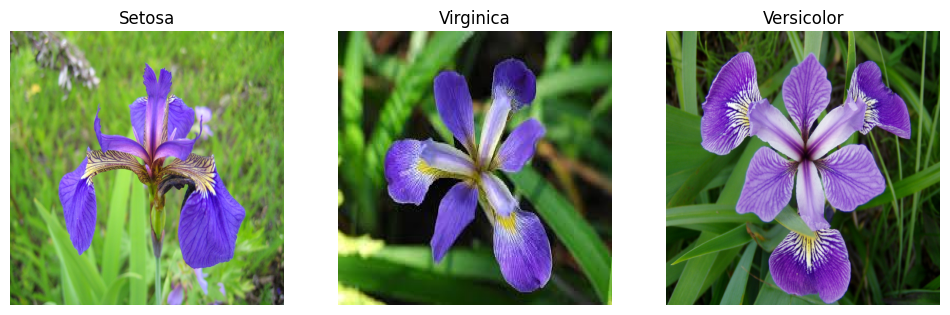

In [2]:
# Criar uma figura com 3 subplots lado a lado
plt.figure(figsize=(12,4))

plt.subplot(1, 3, 1)
plt.imshow(plt.imread('/content/drive/MyDrive/images/iris_setosa.jpg'), extent=[0, 3, 0, 3])
plt.title('Setosa')
plt.axis('off') # Desabilitar os eixos

plt.subplot(1, 3, 2)
plt.imshow(plt.imread('/content/drive/MyDrive/images/iris_virginica.jpeg'), extent=[0, 3, 0, 3])
plt.title('Virginica')
plt.axis('off') # Desabilitar os eixos

plt.subplot(1, 3, 3)
plt.imshow(plt.imread('/content/drive/MyDrive/images/iris_versicolor.jpg'), extent=[0, 3, 0, 3])
plt.title('Versicolor')
plt.axis('off') # Desabilitar os eixos

plt.show()

In [4]:
# importar o arquivo e guardar em um dataframe do Pandas
df_dataset = pd.read_csv( '/content/drive/MyDrive/dataset/iris.csv', sep=',', index_col=None)

print('Dados importados com sucesso!')

Dados importados com sucesso!


## 2.3 Vamos dar uma olhada rápida na base de dados - Análise Exploratória

In [5]:
# exibir uma amostra do dataframe
display(df_dataset)

,id_planta,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cidade_origem,classe
0,0,5.1,3.5,1.4,0.2,São Paulo,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Sorocaba,Iris-setosa
2,2,4.7,3.2,1.3,0.2,São Paulo,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Sorocaba,Iris-setosa
4,4,5.0,3.6,1.4,0.2,São Paulo,Iris-setosa
...,...,...,...,...,...,...,...
147,145,6.7,3.0,5.2,2.3,São Paulo,Iris-virginica
148,146,6.3,2.5,5.0,1.9,Campinas,Iris-virginica
149,147,6.5,3.0,5.2,2.0,Sorocaba,Iris-virginica
150,148,6.2,3.4,5.4,2.3,Sorocaba,Iris-virginica


In [6]:
# Contagem de amostras por classe
print("\nContagem de amostras por classe:")
print(df_dataset['classe'].value_counts())


Contagem de amostras por classe:
classe
Iris-versicolor    51
Iris-virginica     51
Iris-setosa        50
Name: count, dtype: int64


## 3. Pré-processamento

Minimizar ou eliminar problemas existentes em um conjunto de dados, bem como torná-los mais adequados para sua utilização por um determinado algoritmo de aprendizagem de máquina.

## 3.1 Eliminação de atributos irrelevantes

O objetivo do projeto é identificar a espécie de uma flor, que é a (classe). Não é preciso uma análise profunda para observar que os atributos id_planta e cidade_origem não contribuem para a identificação. Portanto, em uma tarefa de aprendizado de máquina, devemos remover esses atributos, pois são irrelevantes.

Em cenários reais, muitas vezes é necessário consultar especialistas para ajudar a identificar quais atributos são irrelevantes.

In [11]:
# remover as colunas id_planta e cidade_origem
try:
  df_dataset = df_dataset.drop(columns=['id_planta','cidade_origem'])
except Exception:
  pass

# imprimir o dataframe
display(df_dataset.tail(n=10))

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
142,6.7,23.1,5.6,2.4,Iris-virginica
143,6.9,3.1,5.1,2.3,Iris-virginica
144,5.8,2.7,5.1,1.9,Iris-virginica
145,6.8,3.2,5.9,2.3,Iris-virginica
146,6.7,3.3,5.7,2.5,Iris-virginica
147,6.7,3.0,5.2,2.3,Iris-virginica
148,6.3,2.5,5.0,1.9,Iris-virginica
149,6.5,3.0,5.2,2.0,Iris-virginica
150,6.2,3.4,5.4,2.3,Iris-virginica
151,5.9,3.0,5.1,1.8,Iris-virginica


## 3.2 Tratamento de atributos com valores ausentes

Verificar se existem atributos com valores ausentes (NaN) na base de dados.

In [12]:
# índices das linhas que contém valores NaN
idxRowNan = df_dataset.isnull().any(axis=1).to_numpy().nonzero()[0]

# imprime apenas as linhas com valores ausentes
display(df_dataset.iloc[idxRowNan])

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
23,5.1,NaN,1.7,0.5,Iris-setosa
24,4.8,NaN,1.9,0.2,Iris-setosa
30,4.8,3.1,NaN,0.2,Iris-setosa


In [13]:
def trataFaltantes( df_dataset ):

    # seleciona apenas as linhas da base de dados, onde a coluna largura_sepala não contém valores nulos
    notNull_ls = df_dataset.loc[ ~pd.isnull(df_dataset['largura_sepala']), :]
    # seleciona apenas as linhas da base de dados, onde a coluna comprimento_petala não contém valores nulos
    notNull_cp = df_dataset.loc[ ~pd.isnull(df_dataset['comprimento_petala']), :]

    # calcula a média dos valores do atributo largura_sepala que não são nulos e que são da classe Iris-setosa
    media_ls = notNull_ls[ notNull_ls['classe']=='Iris-setosa' ]['largura_sepala'].mean()
    # calcula a média dos valores do atributo comprimento_sepala que não são nulos e que são da classe Iris-setosa
    media_cp = notNull_cp[ notNull_cp['classe']=='Iris-setosa' ]['comprimento_petala'].mean()

    # substitui os valores nulos pela média
    df_dataset.loc[ pd.isnull(df_dataset['largura_sepala']), 'largura_sepala'] = media_ls
    # substitui os valores nulos pela média
    df_dataset.loc[ pd.isnull(df_dataset['comprimento_petala']), 'comprimento_petala'] = media_cp

    return df_dataset

trataFaltantes( df_dataset )

# imprime apenas as linhas que antes possuíam valores NaN
print('\nObjeto(s) com valor(es) nulo(s):')
display(df_dataset.iloc[idxRowNan])


Objeto(s) com valor(es) nulo(s):


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
23,5.1,3.416667,1.700000,0.5,Iris-setosa
24,4.8,3.416667,1.900000,0.2,Iris-setosa
30,4.8,3.100000,1.461224,0.2,Iris-setosa


## 3.3 Tratamento de dados inconsistentes ou redundantes

Verificar se existem dados inconsistentes ou redundantes. A forma mais comum de inconsistência é quando há registros representados por atributos com todos os valores iguais, mas com diagnóstico diferentes. A redundância é dada pela repetição de linhas na base de dados.

In [14]:
df_duplicates = df_dataset[ df_dataset.duplicated(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'],keep=False)]

# se houver valores redundantes ou inconsistentes, imprima
if len(df_duplicates) > 0:
    print('\nObjeto(s) redundante(s) e/ou inconsistente(s):')
    display(df_duplicates)
else:
    print('Não existem objetos redundantes e/ou inconsistentes!')


Objeto(s) redundante(s) e/ou inconsistente(s):


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa
50,5.0,3.3,1.4,0.2,Iris-versicolor
102,5.8,2.7,5.1,1.9,Iris-virginica
123,7.7,2.8,6.7,2.0,Iris-virginica
124,7.7,2.8,6.7,2.0,Iris-virginica
144,5.8,2.7,5.1,1.9,Iris-virginica


## Existem objetos redundantes (duplicados) e outros inconsistentes (iguais, exceto diagnóstico distintos).

### Primeiro, serão removidos os registros redundantes, mantendo na base apenas o primeiro deles.

In [15]:
def delDuplicatas( df_dataset ):

    # remove o(s) objeto(s) duplicado(s), mantendo apenas a primeira ocorrência
    df_dataset = df_dataset.drop_duplicates(keep = 'first')

    return df_dataset

df_dataset = delDuplicatas( df_dataset )

### Existem registros inconsistentes. Nesse caso, como não é possível saber qual deles está correto. Assim, eles devem ser eliminados.

In [16]:
def delInconsistencias( df_dataset ):

    df_dataset = df_dataset.drop_duplicates(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'], keep = False)

    return df_dataset

df_dataset = delInconsistencias( df_dataset )

# obtém apenas as amostras onde os valores dos atributos estão duplicados
df_duplicates = df_dataset[ df_dataset.duplicated(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'],keep=False)]

# se existir registros redundantes ou inconsistentes, exibir
if len(df_duplicates) > 0:
    display(df_duplicates)
else:
    print('Não existem registros redundantes e/ou inconsistentes! :)')


Não existem registros redundantes e/ou inconsistentes! :)


In [17]:
# Contagem de amostras por classe
print("\nContagem de amostras por classe:")
print(df_dataset['classe'].value_counts())



Contagem de amostras por classe:
classe
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        47
Name: count, dtype: int64


## 4. Análise dos dados

### A análise das características presentes em um conjunto de dados permite a descoberta de padrões e tendências que podem fornecer informações valiosas para compreender o processo que gerou os dados.

In [18]:
# apresenta as principais estatísticas da base de dados para atributos numéricos
df_detalhes = df_dataset.describe()

display(df_detalhes)

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
count,146.000000,146.000000,146.000000,146.000000
mean,5.958219,3.190639,3.795625,1.215753
std,1.493284,1.715087,1.755223,0.755822
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,20.900000,23.100000,6.900000,2.500000


## 4.1 Detecção de outliers (valor atípico)

### Outro passo importante na análise e tratamento dos dados é a detecção de outliers (dados gerados por leituras incorretas, erros de digitação etc).

## Gráfico Box Plot

### Uma das maneiras mais simples de verificar se os dados contém outliers.

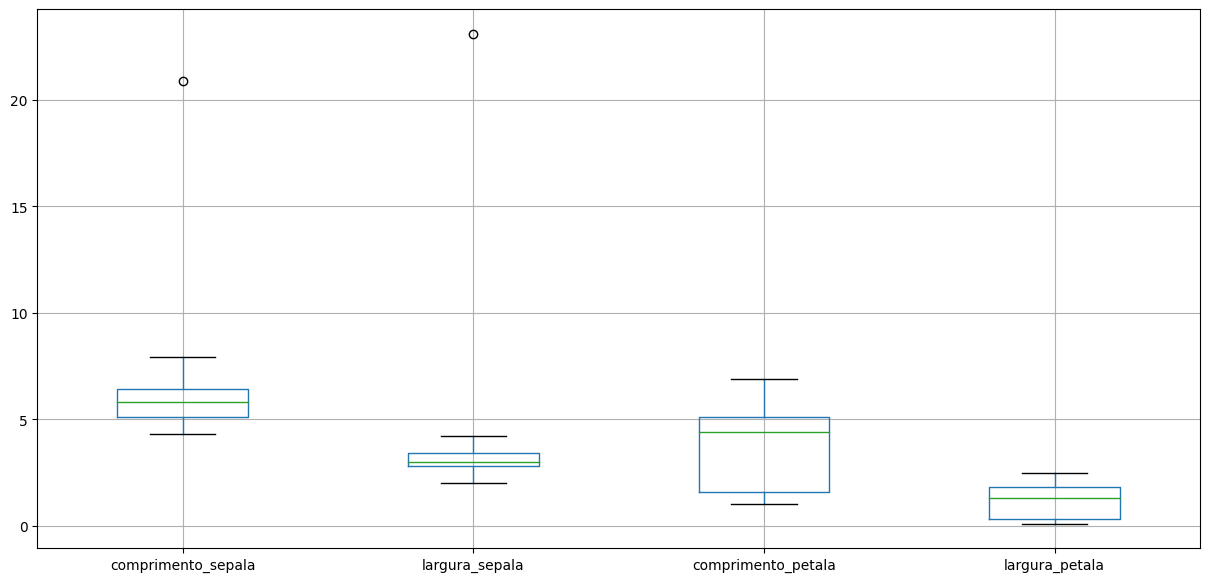

In [19]:

# gerar um bloxplot para cada atributo
df_dataset.boxplot(figsize=(15,7))
plt.show()


O box plot está indicando que os atributos comprimento_petala e largura_petala possuem outliers, o que pode prejudicar o desempenho de vários métodos de aprendizado de máquina, pois tratam-se de objetos com valores de atributos incorretos.

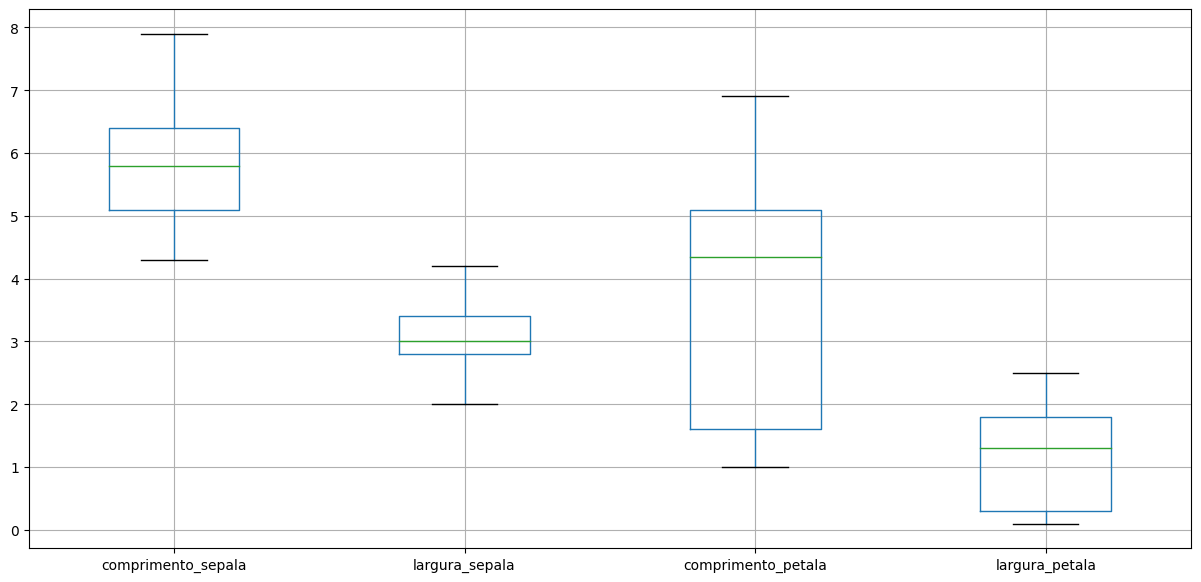

In [20]:
def removeOutliers(df_dataset):
    """
    Remove os outliers da base de dados
    """

    for atributo in df_dataset.columns[:-1]:

        # obtem o terceiro e o primeiro quartil.
        q75, q25 = np.percentile(df_dataset[atributo].values, [75 ,25])

        # calcula o IQR
        IQR = q75 - q25

        # remove os outliers com base no valor do IQR
        df_dataset = df_dataset[ (df_dataset[atributo]<=(q75+1.5*IQR)) & (df_dataset[atributo]>=(q25-1.5*IQR)) ]

    return df_dataset

# remove os outliers
df_dataset = removeOutliers( df_dataset )

# apresenta as principais estatísticas sobre a base de dados
df_dataset.boxplot(figsize=(15,7))
plt.show()

Depois da remoção, o box plot e os gráficos de dispersão indicam que não há mais nenhum outlier na base de dados.

In [21]:
# Contagem de amostras por classe
print("\nContagem de amostras por classe:")
print(df_dataset['classe'].value_counts())


Contagem de amostras por classe:
classe
Iris-versicolor    50
Iris-setosa        47
Iris-virginica     47
Name: count, dtype: int64


# 5. Aprendizado de máquina

## Classifique as espécies de íris com base em suas características.

Classifique as espécies de íris com base em suas características.


Solicite ao ChatGPT a aplicação de algoritmos de aprendizado de máquina para classificar as espécies de íris com base em suas características.

Solicite ao ChatGPT uma explicação da análise como se fosse para uma "criança de 12 anos".

Domine o mundo!